# Tips Data Set - Project 2019
### Programing and Scripting
### GMIT Galway
#### Slawomir Sowa 
#### 04/10/2019

## Objectives

* Create a git repository
* discusses and analyses whether there is a relationship between the total bill and tip amount,
* analyse the relationship between the variables within the dataset.

Full description of Assignment can be found <a href="https://github.com/Slawak1/GMIT-FDA_Assesment_2019/blob/master/project.pdf">here</a>

### Tools
To analyse Iris Data Set I work with Python 3.7 and Jupyter Notebook.

<img width='400px' align='left' src='https://www.python.org/static/community_logos/python-logo-master-v3-TM.png'>

<img width='150px' align='left' src='https://jupyter.org/assets/main-logo.svg'>



#### Used Libraries and tools
#### Pandas
Pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. The two primary data structures of pandas, Series (1-dimensional) and DataFrame (2-dimensional), handle the vast majority of typical use cases in finance, statistics, social science, and many areas of engineering. http://pandas.pydata.org

#### NumPy
NumPy is the fundamental package for scientific computing with Python. It contains among other things: a powerful N-dimensional array object, sophisticated (broadcasting) functions, useful linear algebra, Fourier transform, and random number capabilities, Besides its obvious scientific uses, NumPy can also be used as an efficient multi-dimensional container of generic data. Arbitrary data-types can be defined. This allows NumPy to seamlessly and speedily integrate with a wide variety of databases. https://www.numpy.org/

#### Matplotlib
Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib tries to make easy things easy and hard things possible. You can generate plots, histograms, power spectra, bar charts, errorcharts, scatterplots, etc., with just a few lines of code. For examples, see the sample plots and thumbnail gallery. https://matplotlib.org/index.html

#### Seaborn
Seaborn is a library for making statistical graphics in Python. It is built on top of matplotlib and closely integrated with pandas data structures. https://seaborn.pydata.org/

#### Jupyter Notebook
The Jupyter Notebook is an open-source web application that allows to create and share documents that contain live code, equations, visualizations and narrative text. Uses include: data cleaning and transformation, numerical simulation, statistical modeling, data visualization, machine learning, and much more. https://jupyter.org/index.html

 ## 1. Setting the research goal

The main goal of the project is to analyze the relationship between the bill and the tip and check if such a relationship exists. The secondary goal is to analyze the other variables in the data set. such as customer sex, day of the week, or time of day. 

## 2. Retrieve data

In this step we collect data, ensure that we can use the data in our program, which means checking the existence of, quality, and access to data.

Our data are stored in csv file and we can fined dataset here: [tips dataset](https://github.com/Slawak1/GMIT-FDA_Assesment_2019/blob/master/tips.csv)

To work with data we need to import all necessery tools as pandas and numpy for data manipulation, matplotlib and seaborn for data visualisation. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from statsmodels.graphics.gofplots import qqplot
from sklearn.linear_model import LinearRegression

To read data from Tips.csv file I used pandas library and read_csv function. Variable df is my data frame. 

In [2]:
df = pd.read_csv('tips.csv') 
print(df.shape)

(244, 7)


Pandas <code>shape() </code> function returns tuple representing the dimensionality of the DataFrame. Our dataset contains 244 rows and 7 columns.

To display names of the columns we can use <code>columns</code> atribute.

In [3]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

We can change column name by passing new name to dictionary 

In [4]:
df = df.rename(columns = {"day":"week day", "size":"table size"})

<code>df.head() </code>function returns first 5 rows from data freame. It is useful for quickly testing if your object has the right type of data in it.

In [5]:
df.head(5)

,total_bill,tip,sex,smoker,week day,time,table size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<code>df.tail()</code> returns last 5 rows from data frame. We can use it for veryfying data.

In [6]:
df.tail(5)

,total_bill,tip,sex,smoker,week day,time,table size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


## 3. Data Preparation

This phase consist of three subphases:<br> <i> data cleansing </i> removes false values from a data source and inconsistencies acreoo data source, <br> <i> data integration</i> enrich data source by combining information from multiple data source and <br><i> data transformation</i> ensures that the data is in a suitable format for use.

To check is any data missing in Tips data set I used <code>isnull()</code> function from pandas library. Function returns boolean value <code>True</code> if null value exists and <code>False</code> if not null value founded. Pandas will recognise empty cell or <code>NA</code> as missing values.


In [7]:
df.isnull().any()


total_bill    False
tip           False
sex           False
smoker        False
week day      False
time          False
table size    False
dtype: bool

The above code shows us that there is no <code>null</code> values in our data frame.

But sometimes it might be the case where there’s missing values that have different formats than empty cell or N/A.
For example it can be '--', 'na' or 'n/a'. <br>
To find that kind of missing values we can use python code and iterate over a list of missing values.  

In [8]:
# create a list of missing values
missing = ['--','-','na','n/a'] 

# test if values exist in our data frame
for i in missing:
    if i in df.values:
        print ('Missing values exist')
    else:
        print ('No missing values detected')

No missing values detected
No missing values detected
No missing values detected
No missing values detected


## 4. Data Exploration

In this chapter we will try to understand how variables interact with each other, the distribution of the
data, and whether there are outliers.

<code>describe()</code> function generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [9]:
df.describe()

,total_bill,tip,table size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


Scatter plot shows relation between <code>total bill</code> and <code>tip</code>.

Text(0, 0.5, 'Tip in $')

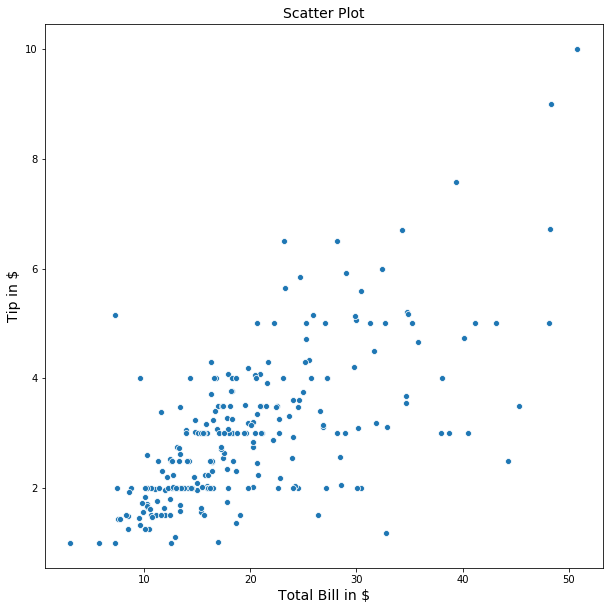

In [15]:
# Scatter Plot
plt.figure(figsize=(10, 10))
ax = sns.scatterplot(x="total_bill", y="tip", data=df )
ax.set_title('Scatter Plot', fontsize='14')
plt.xlabel('Total Bill in $', fontsize='14')
plt.ylabel('Tip in $', fontsize='14')

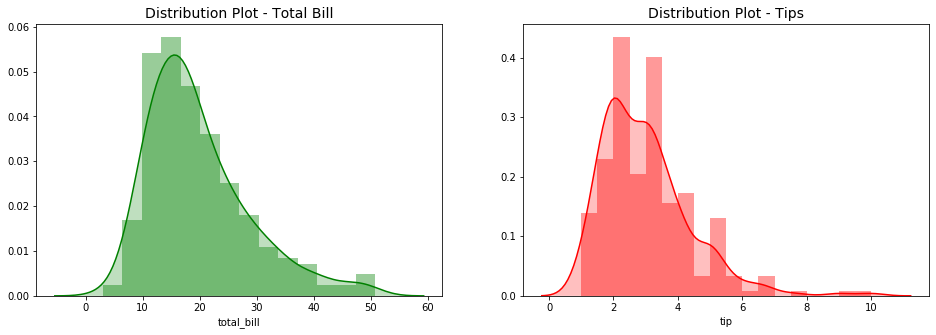

In [13]:
fig, axes = plt.subplots(1,2, figsize = (16,5))

axes[0].set_title('Distribution Plot - Total Bill', fontsize='14')
axes[1].set_title('Distribution Plot - Tips', fontsize='14')


sns.distplot(df['total_bill'], hist=True, color="g",  kde_kws={"shade": True}, ax = axes[0])
sns.distplot(df['tip'], hist=True, color="r", kde_kws={"shade": True}, ax = axes[1])

In [14]:
df.groupby('week day').count()

,total_bill,tip,sex,smoker,time,table size
week day,,,,,,
Fri,19,19,19,19,19,19
Sat,87,87,87,87,87,87
Sun,76,76,76,76,76,76
Thur,62,62,62,62,62,62


As we can see Saturday and Sunday are the busiest day of the week

Let's check the percentage value of tips in relation to the total bill

In [16]:
# percentage value of tips in relation to the total bill
sum_df = df.groupby('week day').sum() # create new dataframe sum_df
sum_df.drop('table size',inplace = True, axis=1) # drop column 'table size'
sum_df['percent'] = sum_df['tip']/sum_df['total_bill']*100 # add new column 'percent'
sum_df 

,total_bill,tip,percent
week day,,,
Fri,325.88,51.96,15.944519
Sat,1778.40,260.40,14.642375
Sun,1627.16,247.39,15.203791
Thur,1096.33,171.83,15.673201


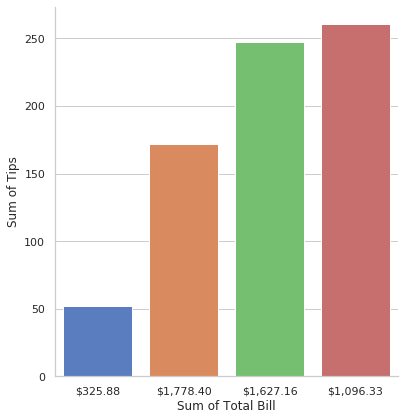

In [17]:
sns.set(style="whitegrid")

# Load the example Titanic dataset


# Draw a nested barplot to show survival for class and sex
fig = sns.catplot(x = 'total_bill', y='tip',  data=sum_df,
                height=6, kind="bar", palette="muted")

fig.set_ylabels("Sum of Tips")
fig.set_xlabels("Sum of Total Bill")

ticks = sum_df['total_bill']

xlabels = ['$' + '{:,.2f}'.format(x) for x in ticks]

fig.set_xticklabels(xlabels)

### Linear Regression 

https://realpython.com/linear-regression-in-python/

In [18]:
# reshape 'total_bill' column to 2D array
z = df['total_bill']

x = z.values.reshape(-1,1)
x.shape


(244, 1)

In [19]:
y = df['tip']
y.shape

(244,)

In [22]:
model = LinearRegression(fit_intercept=True)
results = model.fit(x, y)

In [23]:
# R^2
R_sqr = model.score(x, y)
print (f'R square is equal: {R_sqr}')
print('intercept:', model.intercept_) # The intercept indicates the location where it cross an y axis
print('slope:', model.coef_) # The slope indicates the steepness of a line

R square is equal: 0.45661658635167657
intercept: 0.9202696135546731
slope: [0.10502452]


In [24]:
from statsmodels.api import OLS
OLS(x,y).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.891
Method:                 Least Squares   F-statistic:                              2004.
Date:                Tue, 26 Nov 2019   Prob (F-statistic):                   2.26e-119
Time:                        21:48:47   Log-Likelihood:                         -825.57
No. Observations:                 244   AIC:                                      1653.
Df Residuals:                     243   BIC:                                      1657.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
tip            6.2052      0.139     44.771      0.000       5.932       6.478
==============================================================================
Omnibus:                       33.937   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.569
Skew:                           0.688   Prob(JB):                     2.88e-16
Kurtosis:                       5.269   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Prediction

In [25]:
prediction = model.predict(x)
print('Predicted:', prediction, sep='\n')

Predicted:
[2.70463616 2.00622312 3.12683472 3.40725019 3.5028225  3.57633966
 1.84133463 3.74332864 2.49983836 2.47253198 1.99887141 4.6234341
 2.53974767 2.85587147 2.47778321 3.1866987  2.00517288 2.631119
 2.70253567 3.0890259  2.80230897 3.05121707 2.57650625 5.06033609
 3.00185555 2.79075627 2.32444741 2.25303074 3.19930164 2.98400138
 1.92325375 2.84746951 2.50193885 3.09322688 2.78760553 3.4471595
 2.63321949 2.69833469 2.88317784 4.20438627 2.60486287 2.75399769
 2.38431139 1.93690694 4.11301494 2.84116804 3.25496464 4.32306398
 3.91871958 2.81491191 2.23727706 2.0009719  4.57617306 1.96421332
 3.60469628 2.96719746 4.91225152 3.69396712 2.10074519 5.98980307
 3.05121707 2.3706582  2.0776398  2.84116804 2.76765087 3.02916192
 2.64792292 1.24269488 3.0449156  2.49668762 2.18266431 2.71303813
 3.74122815 3.57528941 2.46728075 2.02407729 2.80230897 3.77693649
 3.31062763 2.73614352 2.96194623 2.66997807 1.9778665  4.35247084
 2.5985614  4.57827355 2.28873908 2.84011779 3.51542544

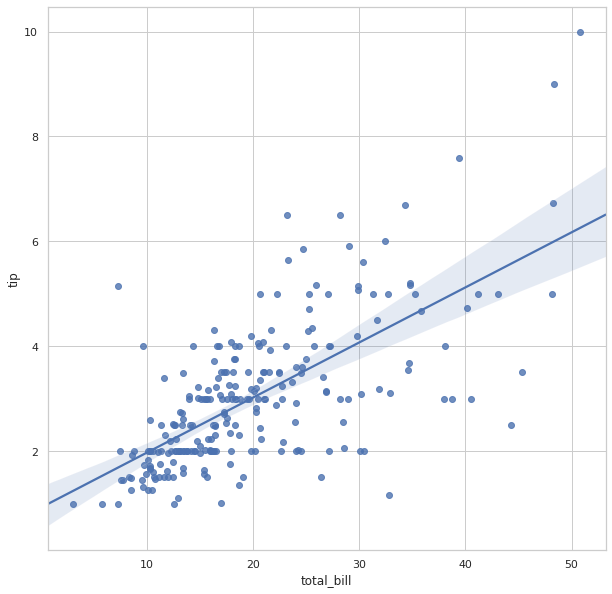

In [26]:
plt.subplots(figsize=(10, 10))
sns.regplot(x="total_bill", y="tip", data=df)

## References

Pandas Data Frame

https://pandas.pydata.org/pandas-docs/stable/reference/frame.html


"Introducing Data Science" Davy Cielen, Arno D. B. Meysman, Mohamed Ali - Manning 2016


missing values:<br>
https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b

Regression Plots:<br>
https://seaborn.pydata.org/tutorial/regression.html